In [20]:
#Reference https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
import seaborn as sns

In [64]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [39]:
# load the train data set 
dftrain = pd.read_csv("bitcoin_train.csv", sep=",",parse_dates=['Date'])
# load the test data set 
dftest = pd.read_csv("bitcoin_test.csv", sep=",",parse_dates=['Date'])

In [24]:
dftrain.shape

(1556, 7)

In [3]:
dftrain.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [4]:
dftrain.iloc[[1]]

,Date,Open,High,Low,Close,Volume,Market Cap
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [31]:
dftrain.iloc[[-1]]

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.3,135.98,132.1,134.21,-,"1,500,520,000"


In [5]:
dftrain.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [6]:
dftest.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-08-07,3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,2017-08-06,3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,2017-08-05,2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,2017-08-04,2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,2017-08-03,2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"


In [7]:
# inspect variables type 
dftrain.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

### Preliminary visualization about the variables

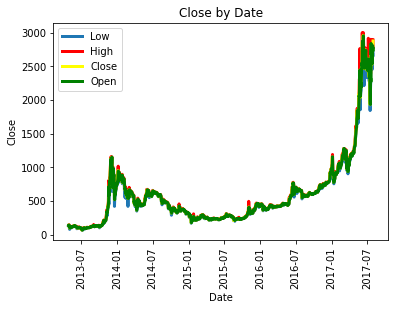

In [8]:
#plot time series
plt.plot(dftrain.Date,dftrain.Low, label='Low',  linewidth=3)
plt.plot(dftrain.Date, dftrain.High, color='red', label='High', linewidth=3)
plt.plot(dftrain.Date,dftrain.Close, color='yellow', label='Close',  linewidth=3)
plt.plot(dftrain.Date,dftrain.Open, color='green', label='Open',  linewidth=3)
#add title and axis labels
plt.title('Close by Date')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=90)
#add legend
plt.legend()
#display plot
plt.show() 

In [10]:
dataf=dftrain[['Date','Open','High','Low','Close','Volume']]
dataf= dataf.set_index("Date")

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

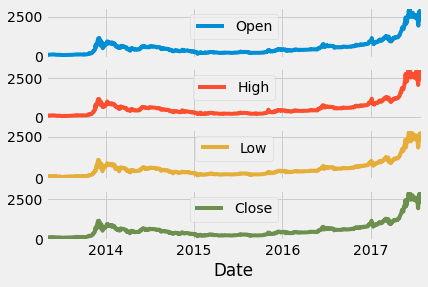

In [11]:
plt.style.use("fivethirtyeight")
dataf.plot(subplots=True)

#### This plot shows the variation of Column A values from 2013 till 2017. 
#### Note that the values have a positive trend overall, but there are ups and downs over the course. 
#### Line charts are used to represent the relation between two data X and Y on a different axis. 

In [12]:
dataframe=dftrain
dataframe.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


<!---
ayabh
-->

In [13]:
dataf['Date'] = dataf.index
dataf['Year'] = dataf['Date'].dt.year
dataf['Month'] = dataf['Date'].dt.month
dataf.head(2)

,Open,High,Low,Close,Volume,Date,Year,Month
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000",2017-07-31,2017,7
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000",2017-07-30,2017,7


Text(0.5, 0.98, '"Close" Value Decomposition')

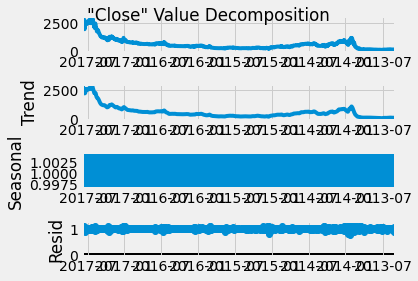

In [14]:
#we're now interested in 2017 and close value 
# Separating the Date Component into
# Year and Month
dataf['Date'] = dataf.index
dataf['Year'] = dataf['Date'].dt.year
dataf['Month'] = dataf['Date'].dt.month
# using inbuilt style
plt.style.use("fivethirtyeight")
 
# Creating a dataframe with "Date" and "Close"
# columns only. This dataframe is date indexed
decomposition_dataframe = dataf[['Date', 'Close']].copy()
decomposition_dataframe.set_index('Date', inplace=True)
decomposition_dataframe.index = pd.to_datetime(decomposition_dataframe.index)
# using sm.tsa library, we are plotting the
# seasonal decomposition of the "Close" column
# Multiplicative Model : Y[t] = T[t] * S[t] * R[t]
decomposition = sm.tsa.seasonal_decompose(decomposition_dataframe,
                                          model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('"Close" Value Decomposition')
 
# changing the runtime configuration parameters to



<!---
 Plotting Timeseries based Box Plot:
Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. 
Boxplot is also used for detecting the outlier in data set. It captures the summary of the data efficiently with a 
simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th,
50th and 75th percentiles. 
-->

<!---
Plotting Timeseries based Box Plot:
Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detecting the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. 
-->

<p>
Plotting Timeseries based Box Plot:
Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detecting the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. 
<p>

C:\Users\eyabe\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\eyabe\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


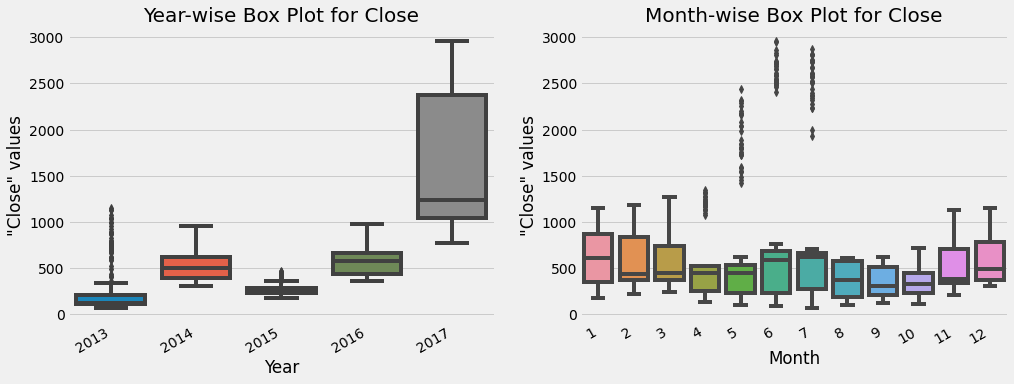

In [15]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(dataf['Year'],
            dataf["Close"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for Close',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('"Close" values')
 
# Using Seaborn Library for Box Plot
sns.boxplot(dataf['Month'],
            dataf["Close"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for Close',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('"Close" values')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

<p>
Here, through these plots, we will be able to obtain an intuition of the ‘Close’ value ranges of each year (Year-wise Box Plot) as well as each month (Month-wise Box Plot). Also, through the Month-wise Box Plot, we can observe that the value range is slightly higher in Jan and Feb, compared to other months.
<p>

<p>
Plotting Timeseries based Heatmap:
We can interpret the trend of the “A” column values across the years sampled over 12 months, variation of values across different years, etc. We can also infer how the values have changed from the average value. This heatmap is a really useful visualization. This Heatmap shows the variation of Close across Years as well as Months, differentiated using a Colormap.
    <p>

Text(13.060000000000002, 0.5, 'Months')

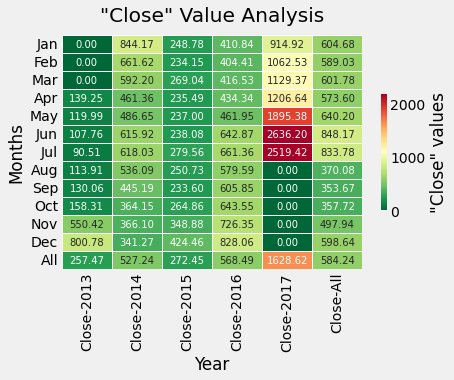

In [16]:
import calendar
import seaborn as sns
import pandas as pd
 
 
# Creating a Pivot Table with "Close"
# column values and is Month indexed.
table_df = pd.pivot_table(dataf, values=["Close"],
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
 
# Naming the index, can be generated
# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
             'May', 'Jun', 'Jul', 'Aug',
             'Sep','Oct', 'Nov', 'Dec', 'All']]
 
# Indexing using Month Names
table_df = table_df.set_index(mon_name)
 
# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
ax = sns.heatmap(table_df, cmap='RdYlGn_r',
                 robust=True, fmt='.2f',
                 annot=True, linewidths=.6,
                 annot_kws={'size':10},
                 cbar_kws={'shrink':.5,
                           'label':'"Close" values'})                      
 
# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title('"Close" Value Analysis', pad=14)
plt.xlabel('Year')
plt.ylabel('Months')

In [17]:
dataframe = pd.read_csv("bitcoin_train.csv", sep=",",index_col='Date',parse_dates=True)
dataframe=dataframe['2017-07-01':'2017-07-31']
dataframe.head(10)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-26,2577.77,2610.76,2450.80,2529.45,"937,404,000","42,455,000,000"
2017-07-25,2757.50,2768.08,2480.96,2576.48,"1,460,090,000","45,410,100,000"
2017-07-24,2732.70,2777.26,2699.19,2754.86,"866,474,000","44,995,600,000"
2017-07-23,2808.10,2832.18,2653.94,2730.40,"1,072,840,000","46,231,100,000"


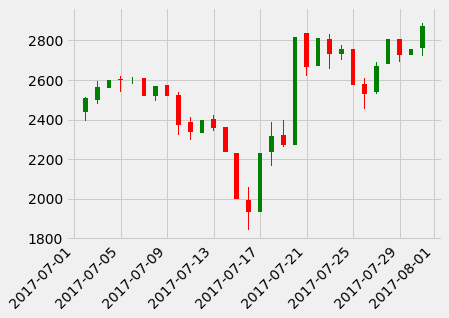

In [18]:
import matplotlib.pyplot as plt

#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = dataframe[dataframe.Close>=dataframe.Open]
down = dataframe[dataframe.Close<dataframe.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

<p>
    A candlestick chart is a type of financial chart that displays the price movements of securities over time.
    Each candlestick represents the price movement of the security on a particular day. The color of the candlestick tells us whether the price closed higher (green) or lower (red) than the previous day.
    We can use the following code to create a candlestick chart to visualize the price movements of this stock during this 8-31 period:
<p>

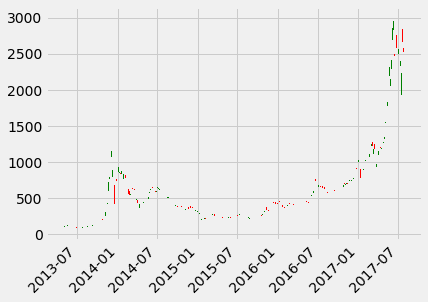

In [19]:
import matplotlib.pyplot as plt

#create figure
plt.figure()

#define width of candlestick elements
width = .7
width2 = .1

#define up and down prices
up = dataf[dataf.Close>=dataf.Open]
down = dataf[dataf.Close<dataf.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

In [37]:
# library to visualize missing values
import missingno as mnso



In [34]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [40]:
data2=dftrain
data2.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [41]:
data2['Date'] = data2.index
dataf.set_index("Date")
data2.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,1,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,3,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,4,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
